# TP: Simulation de variables aléatoires
Auteur: Noé Blassel

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

## Exercice 4.3.1

Méthode de simulation rapide d'une variable géométrique. Avec `numpy`:

In [122]:
N = 10000000  # nombre de tirages
p = 0.1
G1 = np.random.geometric(p=p, size=N)  # methode native

Méthode de l'exercice:

In [124]:
lam = -np.log(1-p) # Le λ correspondant à p
U = np.random.uniform(size=N) # on tire des variables uniforme U[0,1] i.i.d
G2 = 1 + np.floor(-np.log(U) / lam) # G2 est composée de variables géométriques i.i.d

On compare les histogrammes donnés par les deux méthodes:

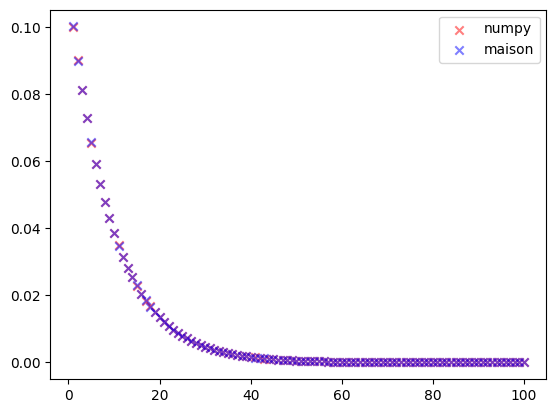

In [125]:
max_k = 100
N_range = np.linspace(1,max_k,max_k).reshape(1,max_k)

P1 = (G1.reshape(N,1) == N_range).mean(axis=0) # loi empirique de G1
P2 = (G2.reshape(N,1) == N_range).mean(axis=0) # loi empirique de G2

fig = plt.figure()
plt.scatter(N_range,P1,marker="x",color="r",alpha=0.5,label="numpy")
plt.scatter(N_range,P2,marker="x",color="b",alpha=0.5,label="maison")
plt.legend(loc="best")
plt.show()

## Exercice 4.3.2
On veut simuler une variable de Poisson $\mathcal P(\lambda)$. La librairie `numpy` offre une fonction pour cela.

In [6]:
N = 500000  # nombre de tirages
lam = 3.0
P1 = np.random.poisson(lam, size=N)  # methode numpy

### Méthode 1: lien avec la loi exponentielle

Il s'agit de la méthode de l'exercice 4.3.2

In [7]:
def poisson_maison(lam):
    u = -np.log(np.random.rand()) #variable exponentielle E(1)
    r = lam # exp(-λ)
    i = 0
    while u < r: #tant que le produit ne dépasse pas r, on itère
        u -= np.log(np.random.rand())
        i += 1
    return i # on renvoie le premier indice satisfaisant la condition

In [8]:
P2 = np.array([poisson_maison(lam) for i in range(N)]) # nos variables de Poisson i.i.d

Petite comparaison d'histogrammes:

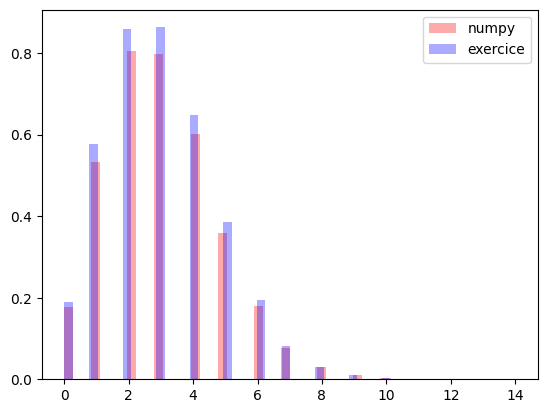

In [9]:
fig = plt.figure()
plt.hist(P1, density=True, label="numpy",bins=50, alpha=1/3, color="r")
plt.hist(P2, density=True, label="exercice",bins=50, alpha=1/3, color="b")
# plt.hist(Xm,density=True,label="approx",bins=50,alpha=1/3,color="y")
plt.legend(loc="best")
plt.show()


## Exercice 4.3.3

On compare différentes méthodes pour simuler des Gaussiennes standard indépendantes. Avec `numpy`, on utilise la fonction suivante.

In [10]:
N = 100000
mu, sigma = 0.0, 1.0

G1 = np.random.normal(loc=mu, scale=sigma, size=N)  # méthode numpy de base

### Méthode 1: Box-Muller

Elle consiste à exploiter l'égalité en loi
$$(\sqrt{R}\cos \Theta ,\sqrt{R}\sin \Theta) \overset{\mathcal{L}}{=} G\sim\mathcal{N}\left(0,I_2\right),\$$
où $R\sim \mathcal{E}(1/2)$ est une variable exponentielle et $\Theta \sim \mathcal{U}[0,2\pi]$ une variable uniforme.


In [11]:
R = np.random.exponential(scale=2.0, size=N//2)  # scale= 1/lambda
T = 2*np.pi*np.random.uniform(size=N//2)
G2 = np.concatenate((np.sqrt(R)*np.cos(T), np.sqrt(R)*np.sin(T)))

### Méthode 2: Box-Muller par méthode de rejet

On utilise l'égalité en loi prouvée dans l'exercice, à savoir
$$\left(X\sqrt{\frac{-2\ln(X^2+Y^2)}{X^2+Y^2}},Y\sqrt{\frac{-2\ln(X^2+Y^2)}{X^2+Y^2}}\right)\overset{\mathcal{L}}{=} G\sim\mathcal{N}\left(0,I_2\right),$$

où le couple $(X,Y)$ est distribué uniformément sur le disque $D(0,1)$. On tire selon la loi de $(X,Y)$ par une méthode de rejet par rapport à la densité uniforme sur $[-1,1]^2$.

k empirique = 1.274664763167287, k theorique = 1.2732395447351628


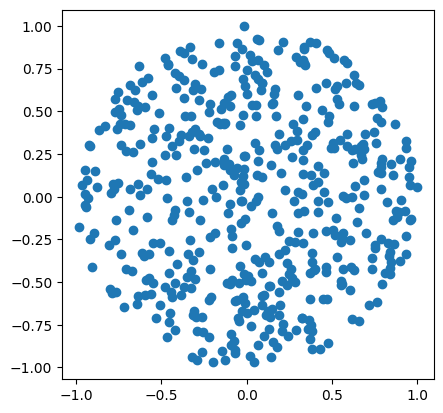

In [12]:
X = np.random.uniform(low=-1.0, high=1.0, size=N//2)
Y = np.random.uniform(low=-1.0, high=1.0, size=N//2)

# rejet
X_tmp = X[X**2+Y**2 < 1]
Y = Y[X**2+Y**2 < 1]
X = X_tmp

print(f"k empirique = {(N//2)/np.size(X)}, k theorique = {4/np.pi}")

ax=plt.axes()
ax.scatter(X[:500],Y[:500])
ax.set_aspect("equal")
plt.show()

On peut ensuite tirer selon la méthode proposée

In [13]:
R = X**2 + Y**2
G3 = np.concatenate((X*np.sqrt(-2*np.log(R)/R), Y*np.sqrt(-2*np.log(R)/R)))


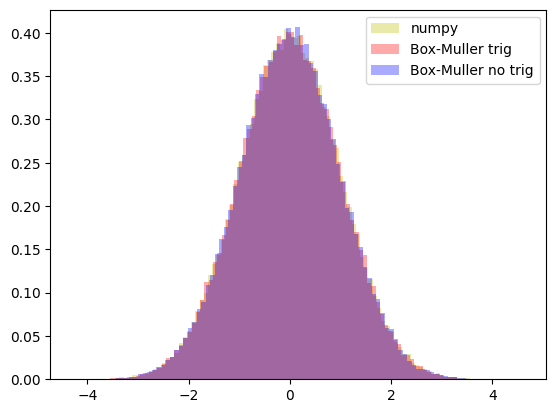

In [14]:
fig = plt.figure()
plt.hist(G1, density=True, label="numpy", alpha=1/3, color="y", bins=100)
plt.hist(G2, density=True, label="Box-Muller trig",
         alpha=1/3, color="r", bins=100)
plt.hist(G3, density=True, label="Box-Muller no trig",
         alpha=1/3, color="b", bins=100)

plt.legend(loc="best")

plt.show()

## Exercice 4.3.4

On a montré que si
$$ D = \left\{(u,v)\in\mathbb R^2 \middle| u>0,v>0,u^{\frac1a}+v^{\frac1b}<1\right\},$$
et $(U,V)$ est un couple distribué uniformément sur $D$, alors 

$$X = \frac{U^{\frac1a}}{U^{\frac1a}+V^{\frac1b}} \sim \beta(a,b).$$

Pour simuler $(U,V)$, on utilise une méthode de rejet en exploitant le fait que $D \subset [0,1]^2$.

k empirique: 2.8485646082938807.


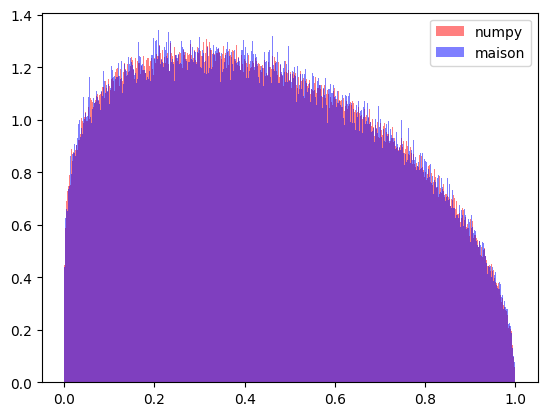

In [135]:
a = 1.2
b = 1.5

N = 1000000

Xref = np.random.beta(a,b,N)

U = np.random.uniform(0,1,N)
V = np.random.uniform(0,1,N)

I = (U**(1/a) + V**(1/b)) < 1 # indices à retenir

print(f"k empirique: {N/I.sum()}.") # coût par échantillon

U = U[I] # rejet
V = V[I]

X = U**(1/a) / (U**(1/a) + V**(1/b))

fig = plt.figure()

plt.hist(Xref,density=True,label="numpy",alpha=0.5,color="r",bins=500)
plt.hist(X,density=True,label="maison",alpha=0.5,color="b",bins=500)

plt.legend(loc="best")

plt.show()

## Exercice 4.3.6

On cherche à implémenter une méthode pour simuler une loi $\Gamma(a,\theta)$.
On écrit $ a = \alpha + \lfloor a\rfloor$ avec $0\leq \alpha <1$. Cette écriture est unique.
Vérifions d'abord que 
$$ \frac1\theta\left(Y - \ln\left(\prod_{k=1}^{\lfloor a\rfloor}U_k\right)\right) \overset{\mathcal L}{=} G \sim \Gamma(a,\theta),$$
où les $U_i$ sont i.i.d uniformes sur $[0,1]$.

In [137]:
a = np.pi  # 3.14..
m = 3
alpha = a-3
theta = 0.5

Galpha = gamma(alpha)

N = 100000  # nombre de tirages
G1 = np.random.gamma(shape=a, scale=1/theta, size=N) # loi gamma avec numpy

In [138]:
G2 = np.random.gamma(shape=alpha, size=N)
U=np.random.uniform(size=(N,m))
G2-=np.sum(np.log(U),axis=1) # log du produit= somme des log
G2 /= theta

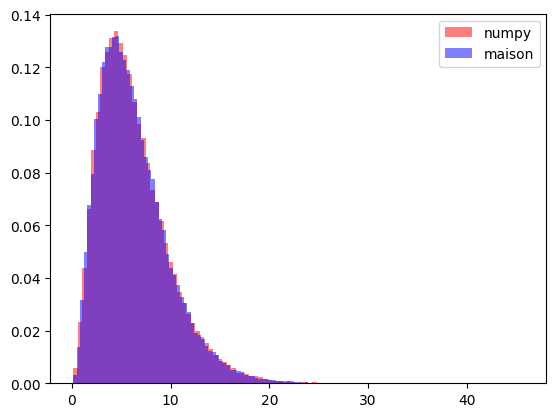

In [139]:
fig = plt.figure()
plt.hist(G1, density=True, bins=100, color="r", alpha=0.5, label="numpy")
plt.hist(G2, density=True, bins=100, color="b", alpha=0.5, label="maison")

plt.legend(loc="best")
plt.show()

Le seul problème est donc de simuler selon la loi $\Gamma(\alpha,1)$ pour $0<\alpha<1$.

### Méthode 1: rejet par rapport à une densité bien choisie

On va implémenter la méthode de rejet de la question 1.b, avec 
$$q(x)= \begin{cases} \frac{\alpha e}{\alpha+e}x^{\alpha-1} && 0< x \leq 1,\\
\frac{\alpha e}{\alpha+e} e^{-x} && x>1\end{cases}$$

/tmp/ipykernel_750819/2322074609.py:2: RuntimeWarning: divide by zero encountered in power
  px = np.exp(-x)*(x**(alpha-1))/Galpha
/tmp/ipykernel_750819/2322074609.py:4: RuntimeWarning: divide by zero encountered in power
  qx[x < 1] = x[x < 1]**(alpha-1)


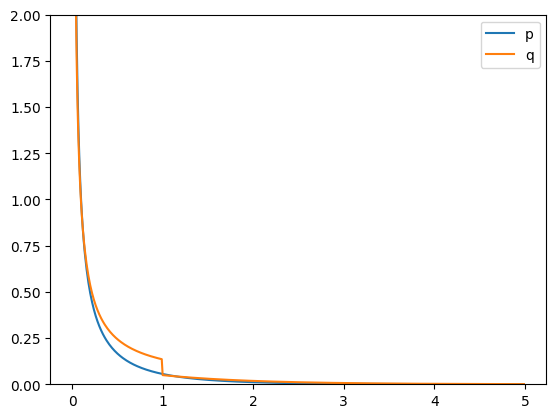

In [140]:
x = np.arange(0, 5, 0.01)
px = np.exp(-x)*(x**(alpha-1))/Galpha
qx = np.zeros_like(x)
qx[x < 1] = x[x < 1]**(alpha-1)
qx[x >= 1] = np.exp(-x[x >= 1])

qx *= (alpha*np.e)/(alpha+np.e)
fig = plt.figure()
plt.plot(x, px, label="p")



plt.plot(x, qx, label="q")
plt.legend(loc="best")
plt.ylim(0, 2)
plt.show()

On implémente à présent la méthode de rejet. Il faut d'abord échantilloner selon la densité $q$.

In [141]:
U = np.random.uniform(size=N)
Y = np.zeros_like(U)
c = (np.e)/(np.e + alpha)
Y[U <= c] = ((alpha+np.e)*U[U <= c]/np.e)**(1/alpha) # inversion de la fonction de répartition
Y[U > c] = -np.log(((alpha+np.e)*U[U > c]/np.e - 1)/alpha)

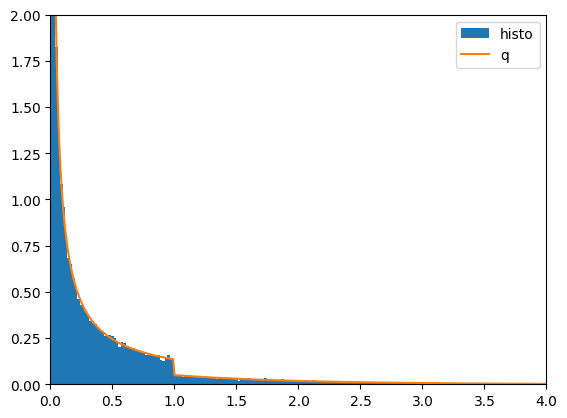

In [144]:
fig = plt.plot()
plt.hist(Y, density=True, label="histo", bins=500)
plt.plot(x, qx, label="q")
plt.legend(loc="best")
plt.ylim(0, 2)
plt.xlim(0,4)
plt.show()

Pour implémenter la méthode de rejet, on se donne une famille *i.i.d* $(V_i)_{i\geq 1}$ de variables uniformes sur $[0,1]$ et une autre $(Y_i)_{i\geq 1}$ de densité $q$. Le théorème sur la méthode de rejet implique que la famille (aléatoire)
$$\left\{Y_i(\omega): kq(Y_i)V_i(\omega)\leq p(Y_i)(\omega)\right\}$$
est composée de variables *i.i.d* de densité $p$.

Pour selectionner les indices vérifiant la condition de non-rejet, on peut utiliser la syntaxe d'indexation booléenne offerte par `numpy`.

In [145]:
V = np.random.uniform(size=N)
# calcul des q(Y_i)
q_Y = np.zeros_like(Y)
q_Y[Y <= 1] = Y[Y <= 1]**(alpha-1)
q_Y[Y > 1] = np.exp(-Y[Y>1])

q_Y *= (alpha*np.e)/(alpha+np.e)
#calcul des p(Y_i)
p_Y = Y**(alpha-1)*np.exp(-Y)/Galpha

k = (alpha+np.e)/(alpha*np.e*Galpha) # notre constante k
G3 = Y[k*q_Y*V <= p_Y] # étape de rejet

print("k theorique = ", k," k empirique = ",N/G3.size)

k theorique =  1.1241838199745562  k empirique =  1.1233809272386173


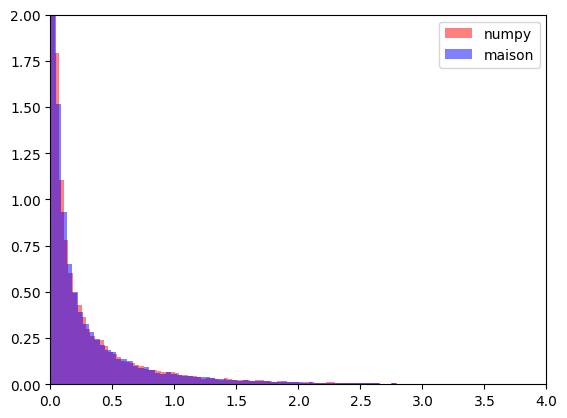

In [147]:
G4=np.random.gamma(shape=alpha,scale=1.0,size=N)
fig = plt.figure()
plt.hist(G4, density=True, bins=200, color="r", alpha=0.5, label="numpy")
plt.hist(G3, density=True, bins=200, color="b", alpha=0.5, label="maison")
plt.ylim(0,2)
plt.xlim(0,4)
plt.legend(loc="best")
plt.show()

### Méthode 2: égalité en loi + rejet

On utilise l'égalité en loi 
$$\frac{Y}{X} \overset{\mathcal L}{=} G\sim \Gamma(a,1),$$
où le couple $(X,Y)$ est distribué uniformément sur 
$$ D_a = \left\{(x,y)\in \mathbb{R}_{>0}^2 : 0< x < \sqrt{f\left(\frac{y}{x}\right)}\right\},$$
où
$$f(z)=z^{a-1}e^{-x}1_{z>0}.$$

On vérifie d'abord la borne de la question 2.


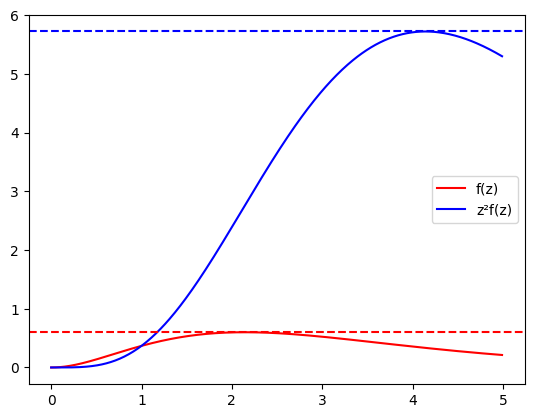

In [148]:
fx = x**(a-1)*np.exp(-x)
fig = plt.figure()
plt.plot(x,fx,label="f(z)",color="r")
plt.plot(x,x**2*fx,label="z²f(z)",color="b")

plt.axhline(((a-1)/np.e)**(a-1),linestyle="dashed",color="r")
plt.axhline(((a+1)/np.e)**(a+1),linestyle="dashed",color="b")
plt.legend(loc="best")
plt.show()

On peut alors simuler $(X,Y)$ uniforme sur $D_a$ par la méthode de rejet, par rapport à la densité uniforme sur 
$$]0,x_a[\times ]0,y_a[,$$
avec $x_a= \left(\frac{a-1}{e}\right)^{\frac{a-1}2}$, et $y_a=\left(\frac{a+1}{e}\right)^{\frac{a+1}2}$.

In [149]:
x_a = ((a-1)/np.e)**((a-1)/2)
y_a = ((a+1)/np.e)**((a+1)/2)

Ux = x_a * np.random.uniform(size=N)
Uy = y_a * np.random.uniform(size=N)

sqrt_f_ratio = np.sqrt((Uy/Ux)**(a-1)*np.exp(-Uy/Ux)) #
X = Ux[Ux < sqrt_f_ratio]
Y = Uy[Ux < sqrt_f_ratio]

k = x_a * y_a /(gamma(a)/2)
print("k theorique = ",k," k empirique = ",N/X.size)

k theorique =  1.6194599730822583  k empirique =  1.618018251245874


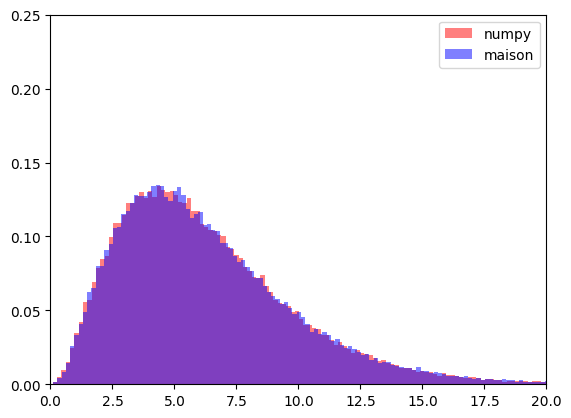

In [151]:
G1=np.random.gamma(shape=a,scale=1/theta,size=N)
G2=(Y/X)/theta

fig = plt.figure()
plt.hist(G1, density=True, bins=200, color="r", alpha=0.5, label="numpy")
plt.hist(G2, density=True, bins=200, color="b", alpha=0.5, label="maison")
plt.ylim(0,0.25)
plt.xlim(0,20)
plt.legend(loc="best")
plt.show()


## Illustration de la loi des grands nombres et du théorème central limite

Dans cette partie, on se propose de visualiser la loi des grands nombres et le théorème central limite.

On va prendre $(X_i)_{i\geq 1}$ une suite <i>i.i.d</i> de variables exponentielles de parametre $\lambda = 1/2$.

### 1) Implémenter ci-dessous une méthode pour simuler les $X_i$:

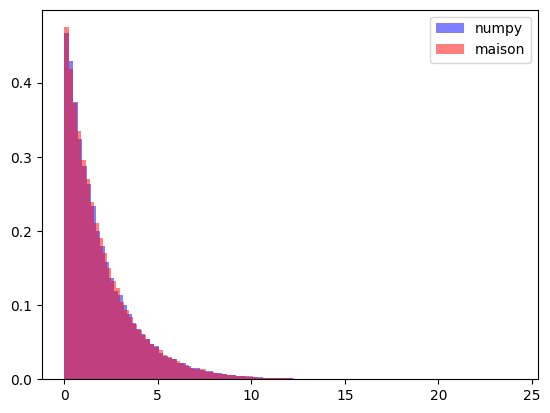

In [175]:
lam = 1/2
N = 100000
U = np.random.uniform(0,1,N)
X =  -(1/lam)*np.log(U)# remplir ici, (on pourra utiliser np.log)

fig = plt.figure()
plt.hist(np.random.exponential(1/lam,N),density=True,label="numpy",color="b",alpha=0.5,bins=100)
plt.hist(X,density=True,label="maison",color="r",alpha=0.5,bins=100)
plt.legend(loc="best")
plt.show()

### 2) Regarder la convergence des moyennes empiriques. On pourra utiliser la fonction `np.cumsum`

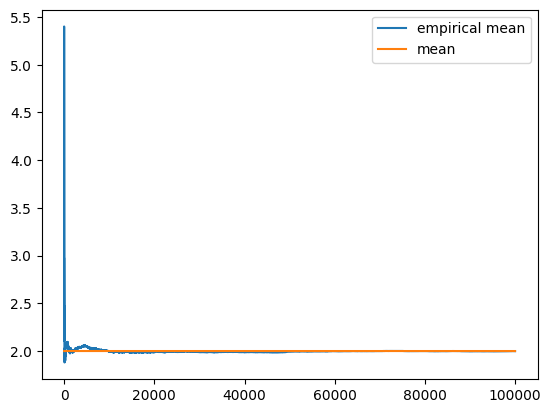

In [181]:
N_range = np.linspace(1,N,N) # [1.0,2.0,..., N]
M = # implémenter ici le vecteurs des moyennes empiriques successives (on pourra utiliser np.cumsum)

fig = plt.figure()
plt.plot(N_range,M,label="empirical mean")
plt.plot(N_range,np.ones(N)/lam,label="mean")
plt.legend(loc="best")
plt.show()

### 3) Refaire avec des variables de Cauchy 
On peut utiliser un échantillonage maison par inversion de la fonction de répartition, ou bien la fonction `np.random.cauchy`. Qu'observe-t-on pour la convergence des moyennes empiriques?

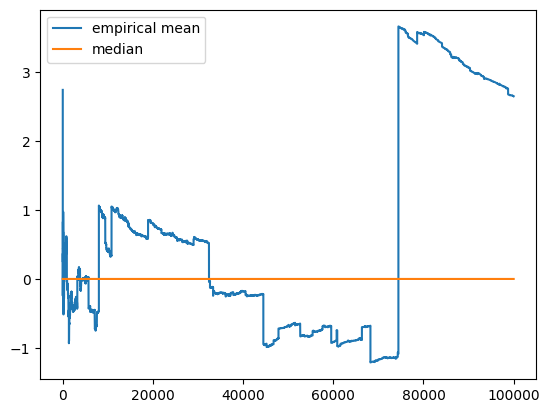

In [169]:
U = np.random.uniform(0,1,N)
X = np.tan(np.pi*U) # Par inversion de la fonction de répartition
M = # ...

fig = plt.figure()
plt.plot(N_range,M,label="empirical mean")
plt.plot(N_range,np.zeros(N),label="median")
plt.legend(loc="best")
plt.show()

### 4) Observation du TCL:

On va considérer les variables

$$Z_n = \frac{\sqrt n}{\sigma}\left(\frac1n \sum_{k=1}^n \left[ X_k - \mu\right]\right),$$
où $\mu = \frac1\lambda$ et $\sigma^2 = \frac1{\lambda^1}$ sont respectivement l'espérance et la variance de nos variables exponentielles. Dans la cellule qui suit, $n$ est un nombre fixé, et on va considérer de nombreux échantillons de la variable $Z_n$ pour visualiser sa loi à l'aide d'un histogramme.

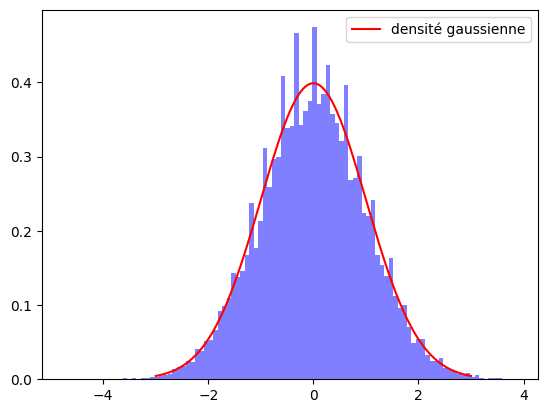

In [237]:
lam = 1/2

N = 10000 # N dans la moyenne empirique
M = 20000 # nombre d'échantillons de Zn
p = 0.5
X = np.random.uniform(0,1,(N,M)) < p

mu = p
sigma =  # que vaut sigma?

Z = (np.sqrt(N)/sigma)*(X.mean(axis=0)-mu)# implémenter ici le calcul de Z (on peut utiliser la syntaxe X.mean(axis= ...))

fig = plt.figure()
plt.hist(Z, density=True,bins=100,alpha=0.5,color="b")

pts = np.linspace(-3,3,1000)
gaussian = np.exp(-pts**2/2)/np.sqrt(2*np.pi)

plt.plot(pts,gaussian,label="densité gaussienne",color="r")

plt.legend(loc="best")
plt.show()


Diminuer le paramètre `N` pour observer empiriquement la convergence en loi.